# Deep CTR (Attention and Self-attention)

In [1]:
import numpy as np
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from deepctr_torch.models import DeepFM
import math
import matplotlib.pyplot as plt

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [29]:
import pandas as pd
import torch
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from deepctr_torch.inputs import SparseFeat, get_feature_names
from deepctr_torch.models import DeepFM

#if __name__ == "__main__":

data = pd.read_csv('C:\\Users\\Lina\\DeepCTR-Torch\\examples\\movielens_sample.txt', sep=',')
sparse_features = ["movie_id", "user_id",
                       "gender", "age", "occupation", "zip"]
target = ['rating']

    # 1.Label Encoding for sparse features,and do simple Transformation for dense features
for feat in sparse_features:
    lbe = LabelEncoder()
    data[feat] = lbe.fit_transform(data[feat])
    # 2.count #unique features for each sparse field
fixlen_feature_columns = [SparseFeat(feat, data[feat].nunique())
                              for feat in sparse_features]
linear_feature_columns = fixlen_feature_columns
dnn_feature_columns = fixlen_feature_columns
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

    # 3.generate input data for model
train, test = train_test_split(data, test_size=0.2)
train_model_input = {name: train[name] for name in feature_names}
test_model_input = {name: test[name] for name in feature_names}
    # 4.Define Model,train,predict and evaluate

device = 'cpu'
use_cuda = True
if use_cuda and torch.cuda.is_available():
    print('cuda ready...')
    device = 'cuda:0'

model = DeepFM(linear_feature_columns, dnn_feature_columns, task='regression', device=device)
model.compile("adam", "mse", metrics=['mse'], )
history = model.fit(train_model_input, train[target].values,
                        batch_size=256, epochs=50, verbose=2, validation_split=0.2)

pred_ans = model.predict(test_model_input, batch_size=256)
rmse=math.sqrt(round(mean_squared_error(test[target].values, pred_ans), 4))
print("test RMSE",rmse )



cpu
Train on 128 samples, validate on 32 samples, 1 steps per epoch
Epoch 1/50
0s - loss:  13.8608 - mse:  13.8608 - val_mse:  12.6752
Epoch 2/50
0s - loss:  13.5150 - mse:  13.5150 - val_mse:  12.3991
Epoch 3/50
0s - loss:  13.2082 - mse:  13.2082 - val_mse:  12.1480
Epoch 4/50
0s - loss:  12.9275 - mse:  12.9275 - val_mse:  11.9194
Epoch 5/50
0s - loss:  12.6701 - mse:  12.6701 - val_mse:  11.7037
Epoch 6/50
0s - loss:  12.4254 - mse:  12.4254 - val_mse:  11.4804
Epoch 7/50
0s - loss:  12.1724 - mse:  12.1724 - val_mse:  11.2493
Epoch 8/50
0s - loss:  11.9106 - mse:  11.9106 - val_mse:  11.0101
Epoch 9/50
0s - loss:  11.6400 - mse:  11.6400 - val_mse:  10.7625
Epoch 10/50
0s - loss:  11.3601 - mse:  11.3601 - val_mse:  10.5064
Epoch 11/50
0s - loss:  11.0707 - mse:  11.0707 - val_mse:  10.2417
Epoch 12/50
0s - loss:  10.7717 - mse:  10.7717 - val_mse:  9.9682
Epoch 13/50
0s - loss:  10.4628 - mse:  10.4628 - val_mse:  9.6860
Epoch 14/50
0s - loss:  10.1439 - mse:  10.1439 - val_mse: 

___________________________________________________________________________

# Autoencoders

In [7]:
## -*- coding: utf-8 -*-

In [8]:
data.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip
0,107,12,4,968035345,Ed Wood (1994),Comedy|Drama,0,2,4,35
1,123,169,3,966536874,Patriot Games (1992),Action|Thriller,1,1,4,118
2,12,6,4,976203603,"Bridges of Madison County, The (1995)",Drama|Romance,0,2,13,99
3,21,112,3,975430389,Indiana Jones and the Temple of Doom (1984),Action|Adventure,1,1,18,55
4,187,45,5,957782527,"Apartment, The (1960)",Comedy|Drama,1,5,19,41


In [9]:
# u.data is tab delimited and passing the column names from README
df = pd.read_csv("C:\\Users\\Lina\\ml-100k\\ml-100k\\u.data", sep="\t", names=['user_id', 'item_id', 'rating'])
df.head(5)

,user_id,item_id,rating
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596


In [10]:
# u.data is | delimited and passing the column names from README
movie_df = pd.read_csv('C:\\Users\\Lina\\ml-100k\\ml-100k\\u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 
                                                  'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
                                                  'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                                                  'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],encoding='ansi')
movie_df.head(5)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
films_db = movie_df
# capture all genre columns, get them to one column, remove them after it is done
genres = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
          'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
          'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movie_df['genre'] = movie_df[genres].idxmax(1)
movie_df = movie_df.drop(genres, axis=1)
movie_df.head(5)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,genre
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,Animation
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,Action
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,Thriller
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,Action
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),Crime


In [12]:
movie_df = movie_df[['movie_id', 'movie_title', 'release_date', 'IMDb_URL', 'genre']]

In [13]:
movie_df['release_year'] = pd.to_datetime(movie_df['release_date'])
movie_df['release_year'] = movie_df['release_year'].dt.year
movie_df = movie_df[['movie_id', 'movie_title', 'release_year', 'IMDb_URL', 'genre']]
movie_df.head(5)

,movie_id,movie_title,release_year,IMDb_URL,genre
0,1,Toy Story (1995),1995.0,http://us.imdb.com/M/title-exact?Toy%20Story%2...,Animation
1,2,GoldenEye (1995),1995.0,http://us.imdb.com/M/title-exact?GoldenEye%20(...,Action
2,3,Four Rooms (1995),1995.0,http://us.imdb.com/M/title-exact?Four%20Rooms%...,Thriller
3,4,Get Shorty (1995),1995.0,http://us.imdb.com/M/title-exact?Get%20Shorty%...,Action
4,5,Copycat (1995),1995.0,http://us.imdb.com/M/title-exact?Copycat%20(1995),Crime


In [14]:
# Creating a sparse pivot table with users in rows and items in columns
users_items_matrix_df = data.pivot(index   = 'user_id', 
                                 columns = 'movie_id', 
                                 values  = 'rating').fillna(0)
users_items_matrix_df.head(10)

movie_id,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
users_items_matrix_df.shape

(193, 187)

In [16]:
users_items_matrix_df.values.mean()*100

1.9894156437893102

In [17]:
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout
from keras.models import Model

def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''

    # Input
    input_layer = Input(shape=(X.shape[1],), name='UserScore')
    
    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='LatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(X.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)    
    
    return model

Using TensorFlow backend.


In [18]:
# input
X = users_items_matrix_df.values
y = users_items_matrix_df.values

In [19]:
# Build model
model = autoEncoder(X)

model.compile(optimizer = Adam(lr=0.0001), loss='mse')
    
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
UserScore (InputLayer)       (None, 187)               0         
_________________________________________________________________
EncLayer1 (Dense)            (None, 512)               96256     
_________________________________________________________________
LatentSpace (Dense)          (None, 256)               131328    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
DecLayer1 (Dense)            (None, 512)               131584    
____________________________________________________________

In [20]:
hist = model.fit(x=X, y=y,
                  epochs=50,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)


Train on 173 samples, validate on 20 samples
Epoch 1/50
173/173 [==============================] - ETA: 0s - loss: 0.851 - 0s 3ms/step - loss: 0.8627 - val_loss: 0.2808
Epoch 2/50
173/173 [==============================] - ETA: 0s - loss: 0.845 - 0s 208us/step - loss: 0.8489 - val_loss: 0.2767
Epoch 3/50
173/173 [==============================] - ETA: 0s - loss: 0.745 - 0s 248us/step - loss: 0.8516 - val_loss: 0.2728
Epoch 4/50
173/173 [==============================] - ETA: 0s - loss: 0.807 - 0s 288us/step - loss: 0.8108 - val_loss: 0.2688
Epoch 5/50
173/173 [==============================] - ETA: 0s - loss: 0.841 - 0s 277us/step - loss: 0.8027 - val_loss: 0.2649
Epoch 6/50
173/173 [==============================] - ETA: 0s - loss: 0.729 - 0s 300us/step - loss: 0.7685 - val_loss: 0.2611
Epoch 7/50
173/173 [==============================] - ETA: 0s - loss: 0.700 - 0s 424us/step - loss: 0.7525 - val_loss: 0.2574
Epoch 8/50
173/173 [==============================] - ETA: 0s - loss: 0.72

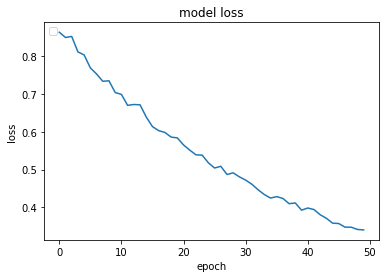

In [21]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['loss'])
    #plt.plot(hist.history['val_loss'])

plot_hist(hist)

In [22]:
# Predict new Matrix Interactions, set score zero on visualized movies
new_matrix = model.predict(X) * (X == 0)

In [23]:
# converting the reconstructed matrix back to a Pandas dataframe
new_users_items_matrix_df  = pd.DataFrame(new_matrix, 
                                          columns = users_items_matrix_df.columns, 
                                          index   = users_items_matrix_df.index)
new_users_items_matrix_df.head()

movie_id,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
user_id,,,,,,,,,,,,,,,,,,,,,
0,-0.204988,-0.049430,0.219437,-0.141329,0.340770,0.033746,0.006264,-0.279360,-0.106325,-0.171172,...,-0.167695,0.122921,-0.141802,-0.002746,-0.053089,0.205030,0.369263,0.014163,0.198460,0.187967
1,0.056059,-0.133100,-0.057197,-0.130317,-0.090754,0.280355,0.102626,0.019801,0.112965,-0.142230,...,0.061623,-0.152383,0.067659,0.003943,-0.332238,-0.385959,0.014188,0.179019,0.053512,0.164694
2,-0.035678,0.006224,-0.063676,-0.061545,-0.033900,-0.212226,-0.123311,0.103342,-0.052299,-0.075817,...,0.040012,0.007482,0.191679,0.036014,0.097230,0.095890,0.000932,0.079664,0.148807,0.047616
3,-0.043968,-0.069654,0.048727,0.030307,0.110999,0.045713,0.040951,0.035061,-0.010481,0.053369,...,0.003906,0.064669,-0.045876,0.040502,-0.066680,0.224185,-0.025878,0.025309,0.071406,-0.011707
4,0.028585,-0.080039,-0.236472,0.241112,0.185926,-0.333737,-0.003592,-0.103260,-0.068947,-0.085219,...,0.204095,0.142520,-0.021363,-0.158148,-0.124251,-0.131642,-0.132991,0.340915,-0.118405,0.233472


In [24]:
print(new_users_items_matrix_df.values.min(), new_users_items_matrix_df.values.max())

-1.2996459 1.2761822


In [25]:
def recommender_for_user(user_id, interact_matrix, df_content, topn = 10):
    pred_scores = interact_matrix.loc[user_id].values

    df_scores   = pd.DataFrame({'movie_id': list(users_items_matrix_df.columns), 
                               'score': pred_scores})

    df_rec      = df_scores.set_index('movie_id')\
                    .join(df_content.set_index('movie_id'))\
                    .sort_values('score', ascending=False)\
                    .head(topn)[['score', 'movie_title']]
    
    return df_rec[df_rec.score > 0]

In [26]:
recommender_for_user(
    user_id         = 5, 
    interact_matrix = users_items_matrix_df, 
    df_content      = movie_df)

,score,movie_title
movie_id,,
142,4.0,Bedknobs and Broomsticks (1971)


In [27]:
recommender_for_user(
    user_id         = 5, 
    interact_matrix = new_users_items_matrix_df, 
    df_content      = movie_df)

,score,movie_title
movie_id,,
144,0.706509,Die Hard (1988)
168,0.626998,Monty Python and the Holy Grail (1974)
41,0.594551,Billy Madison (1995)
163,0.496261,"Return of the Pink Panther, The (1974)"
27,0.449551,Bad Boys (1995)
166,0.436371,Manon of the Spring (Manon des sources) (1986)
18,0.419408,"White Balloon, The (1995)"
97,0.418654,Dances with Wolves (1990)
151,0.414383,Willy Wonka and the Chocolate Factory (1971)


In [139]:
movie_df[movie_df.movie_id==142]

,movie_id,movie_title,release_year,IMDb_URL,genre
141,142,Bedknobs and Broomsticks (1971),1971.0,http://us.imdb.com/M/title-exact?Bedknobs%20an...,Adventure


In [142]:
movie_df[movie_df.movie_id==37]

,movie_id,movie_title,release_year,IMDb_URL,genre
36,37,Nadja (1994),1994.0,http://us.imdb.com/M/title-exact?Nadja%20(1994),Drama


In [143]:
movie_df[movie_df.movie_id==68]

,movie_id,movie_title,release_year,IMDb_URL,genre
67,68,"Crow, The (1994)",1994.0,"http://us.imdb.com/M/title-exact?Crow,%20The%2...",Action


In [147]:
movie_df[movie_df.movie_id==74]

,movie_id,movie_title,release_year,IMDb_URL,genre
73,74,Faster Pussycat! Kill! Kill! (1965),1965.0,http://us.imdb.com/M/title-exact?Faster%20Puss...,Action
